In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [0]:
train = pd.read_csv("/content/sample_data/titanic/train.csv")
test = pd.read_csv('/content/sample_data/titanic/test.csv')
sub = pd.read_csv("/content/sample_data/titanic/gender_submission.csv")

In [193]:
train.head(7)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S


In [194]:
print(train.isnull().sum())
print(test.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [195]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

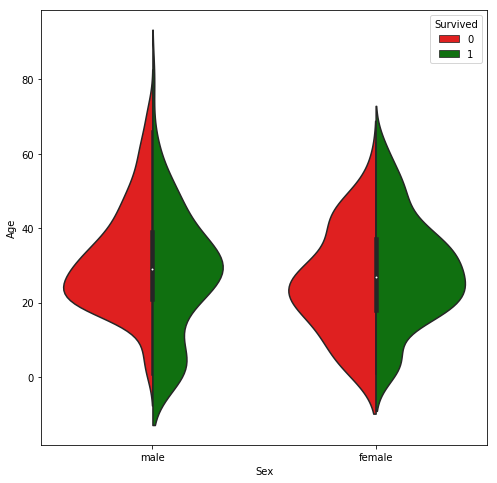

In [196]:
fig = plt.figure(figsize=(8, 8))
sns.violinplot(x='Sex', y='Age', 
               hue='Survived', data=train, 
               split=True,    # 사망 생존을 하나로 만든다.
               palette={0: "r", 1: "g"}
              );

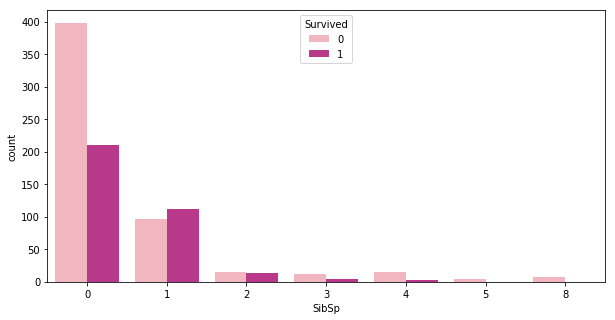

In [162]:
fig = plt.figure(figsize=(10,5))
sns.countplot(x='SibSp', hue='Survived',
            data= train, palette='RdPu')

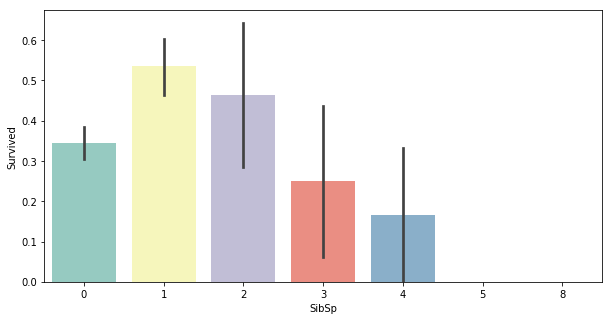

In [27]:
fig = plt.figure(figsize=(10,5))
sns.barplot(x='SibSp', y='Survived',
            data= train, palette='Set3')

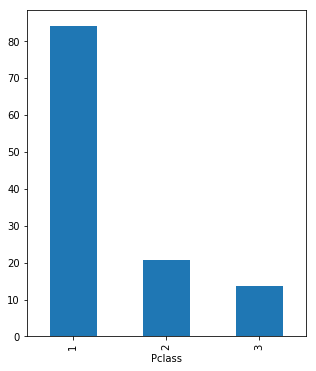

In [31]:
ax = plt.subplot()
a = train.groupby('Pclass').mean()['Fare']
a.plot(kind='bar', figsize=(5,6), ax=ax)

In [0]:
# Pclass로 묶고 Age 평균을 그래프 (1)
# Pclass, Survived로 묶고 Age 평균을 그래프 (2)

b = train.groupby('Pclass').mean()['Age']

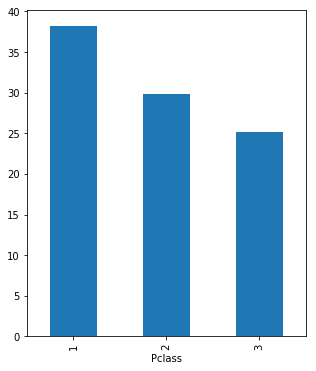

In [43]:
ax = plt.subplot()
b.plot(kind='bar', figsize=(5,6), ax=ax)

In [0]:
c = train.groupby(['Pclass', 'Survived']).mean()['Age']

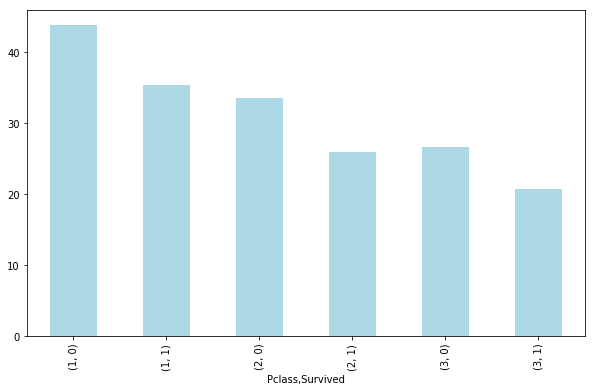

In [62]:
ax = plt.subplot()
c.plot(kind='bar', figsize=(10,6), ax=ax,
       color='lightblue')

In [0]:
train['Age'] = train.Age.fillna(-0.5)    # 중앙값으로 결측치 채우기

In [0]:
### 나이대별 구분
bins = [-1, 0, 5, 12, 18 ,24, 35, 60, np.inf]
labels = ['Unknown', 'Baby', 'Child', 'Teenager',
          'Student', 'Young Adult', 'Adult', 'Senior']

In [0]:
train['AgeGroup'] = pd.cut(train['Age'], bins, labels=labels)

In [200]:
train.AgeGroup.head()

0        Student
1          Adult
2    Young Adult
3    Young Adult
4    Young Adult
Name: AgeGroup, dtype: category
Categories (8, object): [Unknown < Baby < Child < Teenager < Student < Young Adult < Adult < Senior]

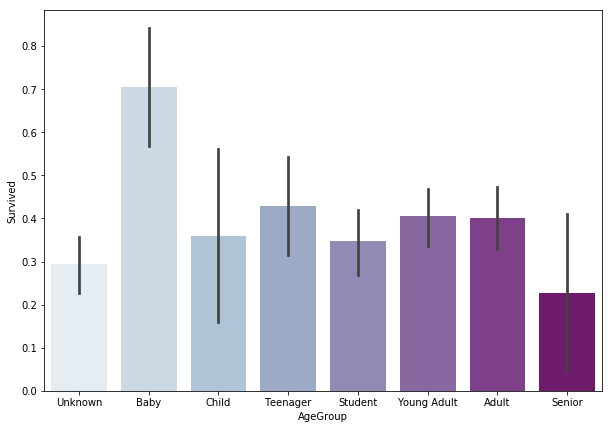

In [72]:
fig = plt.figure(figsize=(10,7))

sns.barplot(x='AgeGroup', y='Survived', data=train,
            palette='BuPu')
plt.show()

In [0]:
bins2 = [-1, 0, 19,35,60, np.inf]
labels2 = ['Unknown', 'Baby', 'Teen', 'Young', 'Adult-Senior']
train['AgeGroup'] = pd.cut(train['Age'], bins2, labels= labels2)

In [74]:
train.AgeGroup.head()

0     Teen
1    Young
2     Teen
3     Teen
4     Teen
Name: AgeGroup, dtype: category
Categories (5, object): [Unknown < Baby < Teen < Young < Adult-Senior]

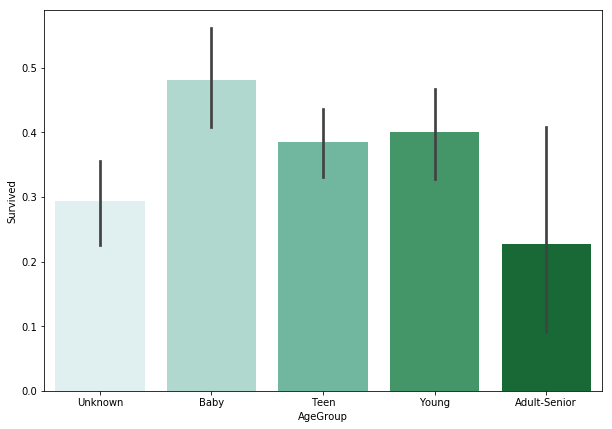

In [84]:
fig = plt.figure(figsize=(10,7))
sns.barplot(x='AgeGroup', y='Survived', data=train,
            palette='BuGn')
plt.show()

In [0]:
test.Age = test.Age.fillna(-0.5)   # 중앙값으로 결측치 채우기

In [0]:
bins3 = [-1, 0, 19,35,60, np.inf]
labels3 = ['Unknown', 'Baby', 'Teen', 'Young', 'Adult-Senior']
test['AgeGroup'] = pd.cut(test.Age, bins3, labels = labels3)

In [140]:
test.AgeGroup.head()

0            Teen
1           Young
2    Adult-Senior
3            Teen
4            Teen
Name: AgeGroup, dtype: category
Categories (5, object): [Unknown < Baby < Teen < Young < Adult-Senior]

In [0]:
bins4 = [1,2,3, np.inf]
labels4 = ['One','Two','Three']
train['SibSpGroup'] = pd.cut(train.SibSp, bins4, labels= labels4)

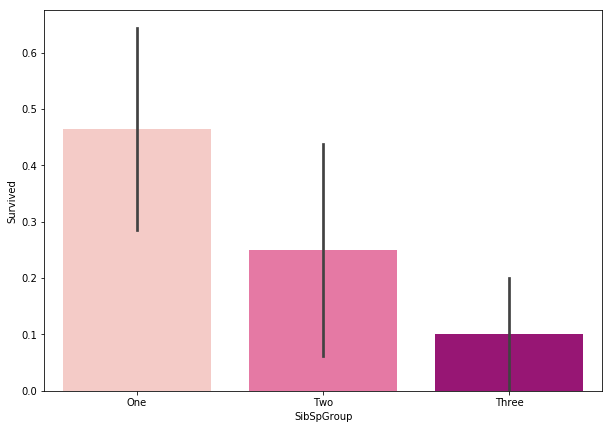

In [105]:
fig = plt.figure(figsize=(10,7))
sns.barplot(x='SibSpGroup', y='Survived', data=train,
            palette='RdPu')
plt.show()

In [0]:
# Cabin의 공백 존재 여부
train['CabinBool'] = (train['Cabin'].notnull().astype('int'))
test['CabinBool'] = (test['Cabin'].notnull().astype('int'))

In [202]:
# R-table(범주형의 빈도수틀)
train['CabinBool'].value_counts()

0    687
1    204
Name: CabinBool, dtype: int64

In [0]:
## 공백 다수. Cabin은 빼고 시작
# 6-4 Cabin열 제외

train = train.drop('Cabin', axis=1)
test = test.drop('Cabin', axis=1)

In [0]:
# 6-5 Ticket 열 제외

train = train.drop('Ticket', axis=1)
test = test.drop('Ticket', axis=1)

In [205]:
# 6-6 Embarked의 S,C,Q 얼마인지 확인

train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [0]:
### 이름(Name)으로 유의미한 정보 가져오기

combine = [train,test]

for dataset in combine :
  dataset['Title'] = dataset.Name.str.extract('([A-Za-z]+)\.', expand=False)  # 하나의 컬럼 False
                                                                              # 여러개의 컬럼 True
                                                                              

In [207]:
train['Title'].head()

0      Mr
1     Mrs
2    Miss
3     Mrs
4      Mr
Name: Title, dtype: object

In [208]:
pd.crosstab(train['Title'], train['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [209]:
train.Title.value_counts().index

Index(['Mr', 'Miss', 'Mrs', 'Master', 'Dr', 'Rev', 'Col', 'Mlle', 'Major',
       'Don', 'Sir', 'Countess', 'Mme', 'Ms', 'Lady', 'Jonkheer', 'Capt'],
      dtype='object')

In [0]:
for dataset in combine:
  dataset['Title'] = dataset['Title'].replace(['Lady','Capt','Col', 'Don', 
                                              'Dr','Major','Rev','Jonkheer','Dona'], 'Rare')
  dataset['Title'] = dataset['Title'].replace(['Countess','Lady', 'Sir'], 'Royal')
  dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
  dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
  dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

In [211]:
train.Title.value_counts().index

Index(['Mr', 'Miss', 'Mrs', 'Master', 'Rare', 'Royal'], dtype='object')

In [212]:
test.Title.value_counts().index

Index(['Mr', 'Miss', 'Mrs', 'Master', 'Rare'], dtype='object')

In [213]:
#map each of the title groups to a numerical value
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Royal": 5, "Rare": 6}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup,CabinBool,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Student,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Adult,1,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Young Adult,0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Young Adult,1,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Young Adult,0,1


In [214]:
# fill missing age with mode age group for each title
mr_age = train[train["Title"] == 1]["AgeGroup"].mode() #Young Adult
miss_age = train[train["Title"] == 2]["AgeGroup"].mode() #Student
mrs_age = train[train["Title"] == 3]["AgeGroup"].mode() #Adult
master_age = train[train["Title"] == 4]["AgeGroup"].mode() #Baby
royal_age = train[train["Title"] == 5]["AgeGroup"].mode() #Adult
rare_age = train[train["Title"] == 6]["AgeGroup"].mode() #Adult

print(mr_age)
print(miss_age)
print(mrs_age)
print(master_age)
print(royal_age)
print(rare_age)
age_title_mapping = {1: "Young Adult", 2: "Student", 3: "Adult", 4: "Baby", 5: "Adult", 6: "Adult"}

0    Young Adult
Name: AgeGroup, dtype: category
Categories (8, object): [Unknown < Baby < Child < Teenager < Student < Young Adult < Adult < Senior]
0    Unknown
Name: AgeGroup, dtype: category
Categories (8, object): [Unknown < Baby < Child < Teenager < Student < Young Adult < Adult < Senior]
0    Adult
Name: AgeGroup, dtype: category
Categories (8, object): [Unknown < Baby < Child < Teenager < Student < Young Adult < Adult < Senior]
0    Baby
Name: AgeGroup, dtype: category
Categories (8, object): [Unknown < Baby < Child < Teenager < Student < Young Adult < Adult < Senior]
0    Young Adult
1          Adult
Name: AgeGroup, dtype: category
Categories (8, object): [Unknown < Baby < Child < Teenager < Student < Young Adult < Adult < Senior]
0    Adult
Name: AgeGroup, dtype: category
Categories (8, object): [Unknown < Baby < Child < Teenager < Student < Young Adult < Adult < Senior]


### Agegroup가 Unknown이면

In [216]:
for x in range(len(train["AgeGroup"])):
    if train["AgeGroup"][x] == "Unknown":
        train["AgeGroup"][x] = age_title_mapping[train["Title"][x]]
        
for x in range(len(test["AgeGroup"])):
    if test["AgeGroup"][x] == "Unknown":
        test["AgeGroup"][x] = age_title_mapping[test["Title"][x]]

# Unknown 채우기      

KeyError: ignored

In [184]:
#map each Age value to a numerical value
age_mapping = {'Baby': 1, 'Child': 2, 'Teenager': 3, 'Student': 4, 'Young Adult': 5, 'Adult': 6, 'Senior': 7}
train['AgeGroup'] = train['AgeGroup'].map(age_mapping)
test['AgeGroup'] = test['AgeGroup'].map(age_mapping)

train.head()

KeyError: ignored